In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 모든 행 출력
pd.set_option('display.max_rows', None)

# 모든 열 출력
pd.set_option('display.max_columns', None)

# 열 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 소수점 표시 자릿수 (필요 시)
pd.set_option('display.precision', 10)

# 데이터가 너무 클 경우 줄바꿈 방지
pd.set_option('display.expand_frame_repr', False)

In [17]:
df = pd.read_csv('강원도_2016-2022.csv', low_memory=False)
df.head()

,GRNDS_ARVL_YMD,IGTN_HTSRC_SCLSF_NM,IGTN_HTSRC_LCLSF_NM,OCRN_YMD,MBLZ_EQPMNT_CNT,WHOL_MNPW_CNT,TP_VL,GRNDS_SGG_NM,CBK_YMD,GRNDS_DSTNC,LYCRG_FRBRG_NOPE,MBLZ_POLICEO_CNT,BGNN_POTFR_TM,FRST_IGOBJ_LCLSF_NM,MBLZ_PRVTM_GAS_REL_INST_CNT,HUM_VL,INJPSN_CNT,ACDNT_OCRN_LOT,FIRE_OCRN_HR,GRNDS_ARVL_TM,PRFECT_POTFR_TM,WTHR_INFO,FCLT_PLC_SCLSF_NM,BGNN_POTFR_YMD,CMBS_EXPOBJ_LCLSF_NM,ACDNT_OCRN_LAT,DSPT_TM,DCSD_CNT,OCRN_CS_NM,MBLZ_FFPWR_CNT,FIRE_TYPE_NM,CBK_TM,ETC_MBLZ_NOPE,MBLZ_GNRL_OCPT_NOPE,RCPT_YMD,IGTN_CS_NM,RCPT_TM,PRFECT_POTFR_YMD,IGTN_DMNT_SCLSF_NM,DSPT_REQ_TM,FRST_IGOBJ_SCLSF_NM,HR_UNIT_WSPD,LFDAU_GRNDS_DSTNC,FRSTN_NM,DSPT_YMD,PRPT_DAM_AMT,CMBS_EXPOBJ_SCLSF_NM,year,IGTN_BRNCH_NM,SN,IGTN_DMNT_LCLSF_NM,MBLZ_SOLD_CNT,CNTR_GRNDS_DSTNC,HR_UNIT_WNDRCT,FIRE_SUPESN_REQ_TM,CNTR_NM,HNL_DAM_CNT
0,20160104,화학적폭발,폭발물/폭죽,20160104,17,100,20.0,고성군,20160104,13,25,6,13200,종이/목재/건초등,0,29,0,NaN,113100,115335,133200,맑음,공유림,20160104,NaN,NaN,113226,0,NaN,7,임야,135234,0,45,20160104,군경사격장,113117,20160104,폭탄/탄약,2109,건초,315.0,13.0,고성소방서,20160104,0,NaN,2016,산중턱,1,화학적요인,17,6,4.0,13825,거진119안전센터,0
1,20160105,불씨/불꽃/화원방치,불꽃/불티,20160105,3,10,-2.0,화천군,20160105,40,0,0,15805,종이/목재/건초등,0,50,0,NaN,135300,135605,135805,맑음,사유림,20160105,NaN,NaN,135404,0,NaN,4,임야,142205,0,0,20160105,기타,135304,20160105,모닥불/연탄/숯,201,풀/나뭇잎,NaN,0.0,춘천소방서,20160105,0,NaN,2016,평지,2,부주의,6,2,NaN,200,사내119안전센터,0
2,20160106,담배꽁초,담뱃불/라이터불,20160106,12,73,20.0,고성군,20160106,10,18,7,34217,종이/목재/건초등,2,22,0,NaN,150900,151538,155457,맑음,사유림,20160106,종이/목재/건초등,NaN,151116,0,기상(건조/강풍등),18,임야,164823,0,28,20160106,기타,150954,20160106,담뱃불,422,풀/나뭇잎,270.0,10.0,고성소방서,20160106,0,풀/나뭇잎,2016,산아래,3,부주의,0,1,4.0,3919,거진119안전센터,0
3,20160112,쓰레기소각,불꽃/불티,20160112,3,84,0.0,양구군,20160112,43,38,15,24823,쓰레기류,10,26,0,NaN,142400,143359,151223,맑음,사유림,20160112,NaN,NaN,142913,0,NaN,6,임야,160223,0,15,20160112,쓰레기소각장,142459,20160112,쓰레기/논밭두렁,446,쓰레기,180.0,7.0,춘천소방서,20160112,628,NaN,2016,평지,4,부주의,0,10,4.0,3824,양구119안전센터,0
4,20160113,논/임야태우기,담뱃불/라이터불,20160113,9,46,-3.0,원주시,20160113,17,9,2,115446,종이/목재/건초등,20,0,0,NaN,112400,114341,120532,맑음,사유림,20160113,종이/목재/건초등,NaN,112552,0,기상(건조/강풍등),15,임야,124454,0,0,20160113,논/밭두렁,112406,20160113,라이터불/성냥불,1749,풀/나뭇잎,180.0,0.0,원주소방서,20160113,0,풀/나뭇잎,2016,산아래,5,부주의,0,11,4.0,2151,우산119안전센터,0


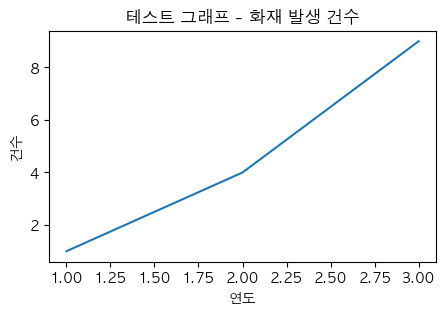

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# macOS 한글 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 한글 테스트
plt.figure(figsize=(5, 3))
plt.plot([1, 2, 3], [1, 4, 9])
plt.title("테스트 그래프 - 화재 발생 건수")
plt.xlabel("연도")
plt.ylabel("건수")
plt.show()

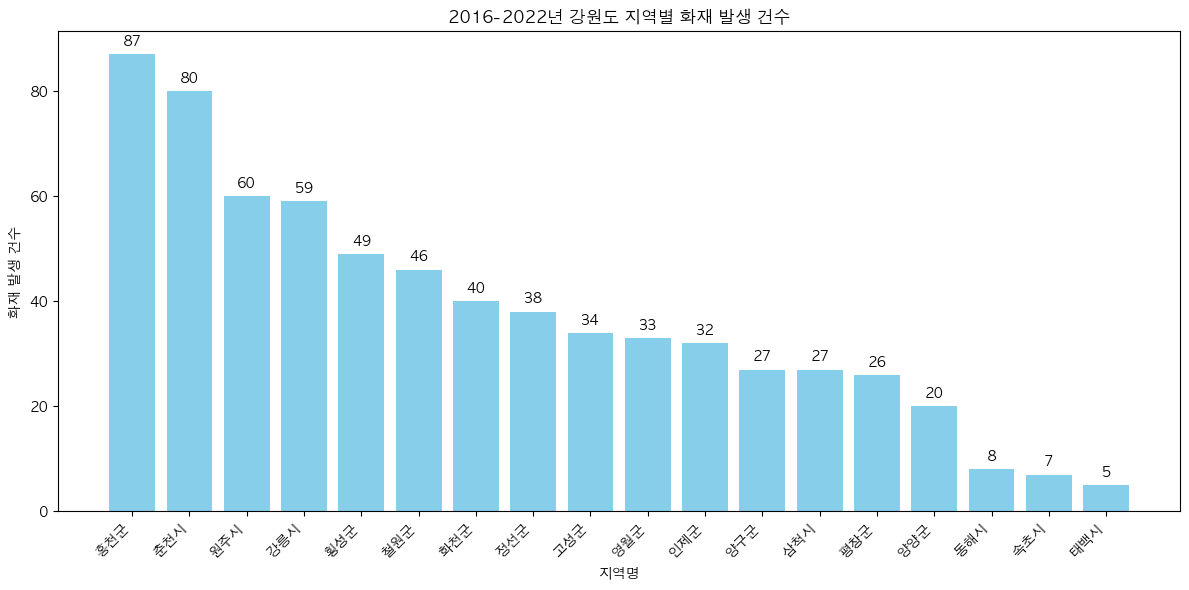

In [19]:
# 지역별 발생 건수 집계
region_counts = df['GRNDS_SGG_NM'].value_counts().reset_index()
region_counts.columns = ['GRNDS_SGG_NM', 'count']

# 바 플롯
plt.figure(figsize=(12, 6))
bars = plt.bar(region_counts['GRNDS_SGG_NM'], region_counts['count'], color='skyblue')

# 각 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval),
             ha='center', va='bottom', fontsize=10)

# 시각화 설정
plt.xticks(rotation=45, ha='right')
plt.xlabel('지역명')
plt.ylabel('화재 발생 건수')
plt.title('2016-2022년 강원도 지역별 화재 발생 건수')
plt.tight_layout()
plt.show()

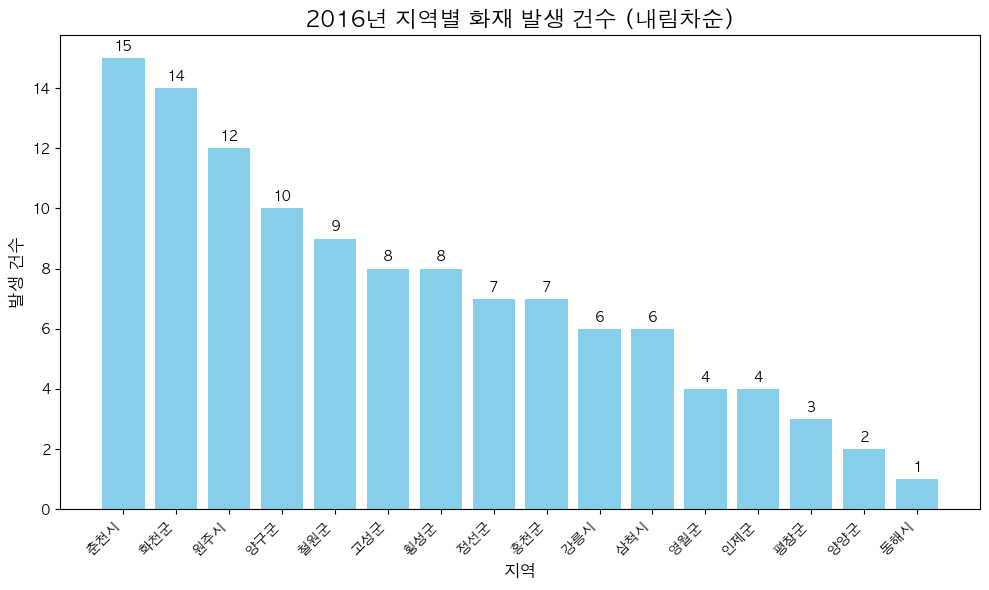

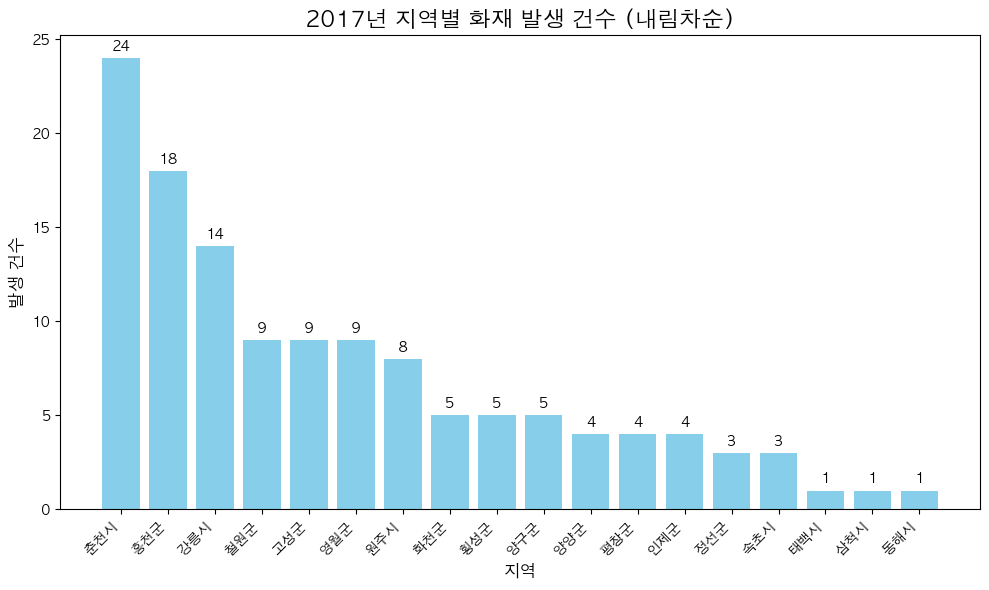

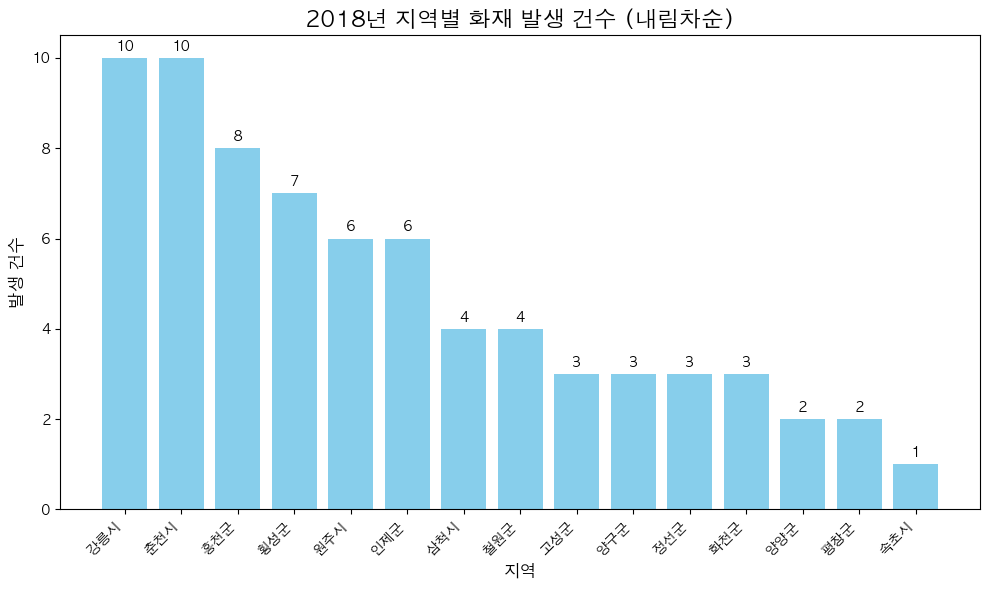

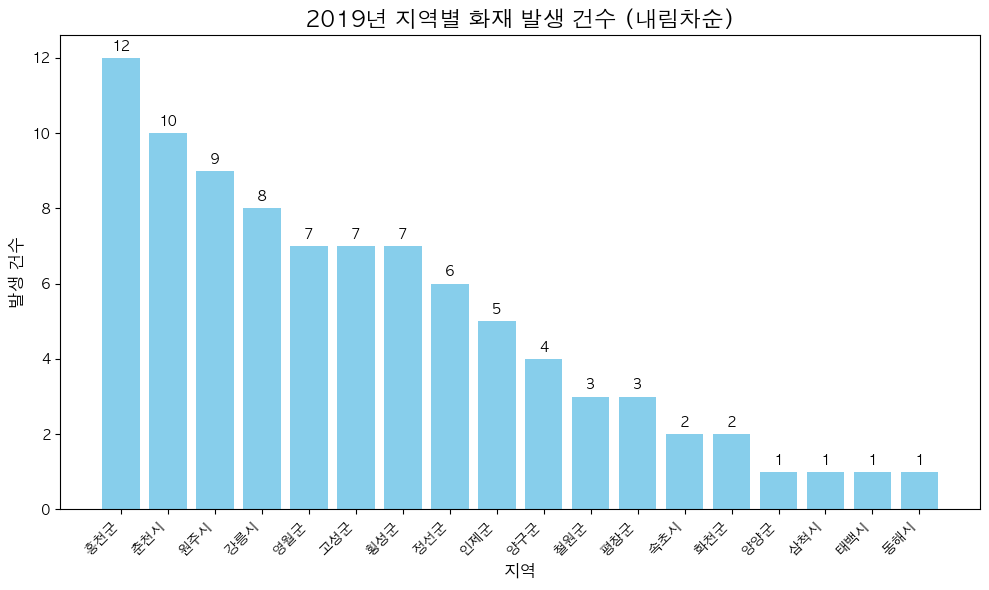

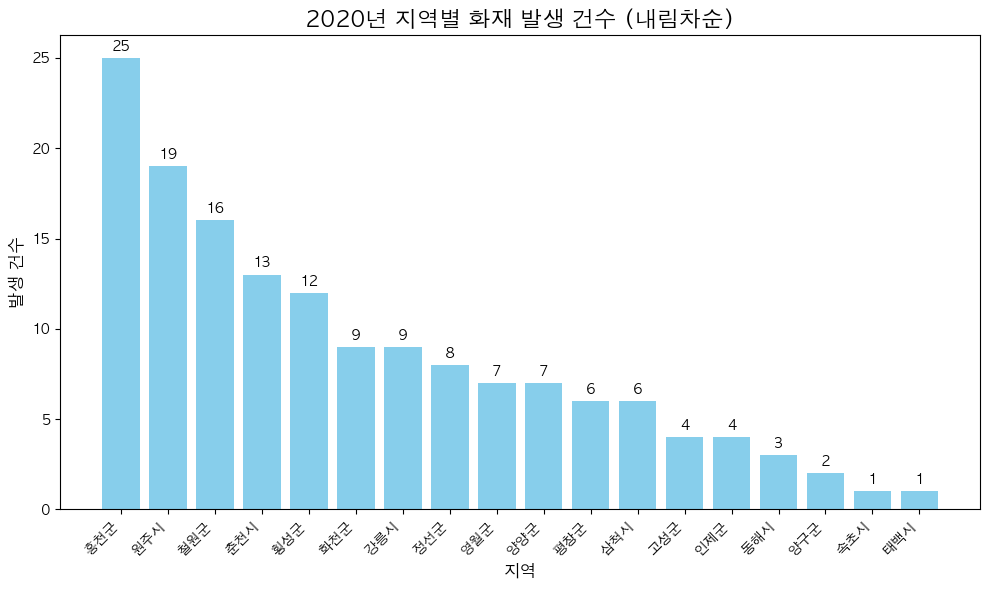

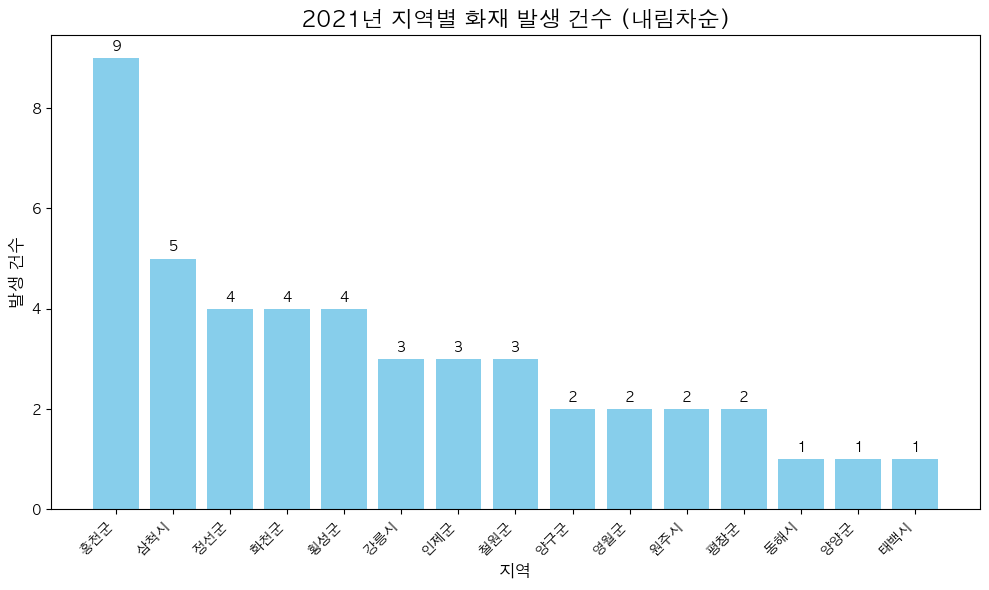

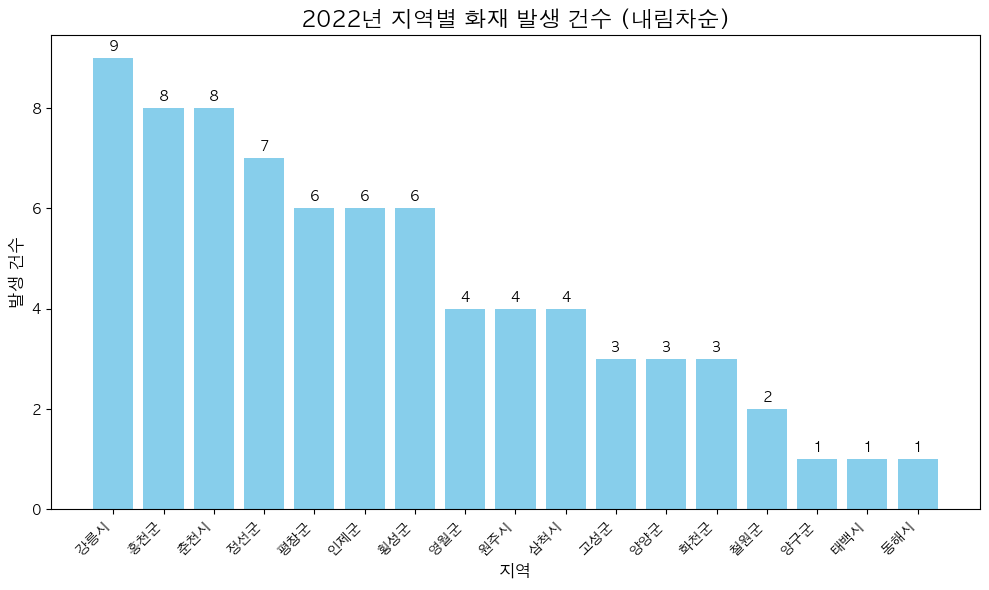

In [20]:
# 연도·지역별 화재 발생 건수 집계
fire_counts = df.groupby(['year', 'GRNDS_SGG_NM']).size().reset_index(name='count')

# 연도별로 그래프 생성 (내림차순 정렬)
years = sorted(fire_counts['year'].unique())
for year in years:
    yearly_data = fire_counts[fire_counts['year'] == year].sort_values('count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(yearly_data['GRNDS_SGG_NM'], yearly_data['count'], color='skyblue')
    plt.title(f'{year}년 지역별 화재 발생 건수 (내림차순)', fontsize=16)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('발생 건수', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # 막대 위에 수치 표시
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

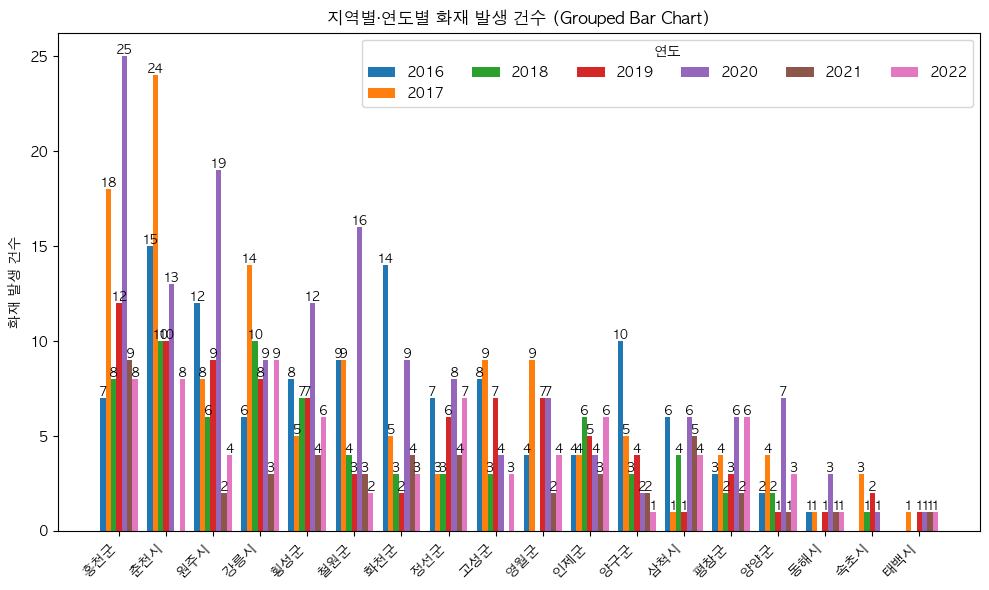

In [21]:
# 컬럼명이 소문자/대문자 혼재할 수 있으니 통일
df.columns = [c.strip() for c in df.columns]
year_col = "year" if "year" in df.columns else "YEAR"
region_col = "GRNDS_SGG_NM"

if year_col not in df.columns or region_col not in df.columns:
    raise ValueError(f"필수 컬럼이 없습니다: {year_col}, {region_col}")

counts = (
    df.groupby([year_col, region_col])
      .size()
      .reset_index(name="count")
)

# 피벗: index=지역, columns=연도, values=건수
pv = counts.pivot(index=region_col, columns=year_col, values="count").fillna(0).astype(int)

# (선택) 가독성을 위해 지역을 '전체 합계' 내림차순 정렬
pv = pv.loc[pv.sum(axis=1).sort_values(ascending=False).index]

# ===== Grouped bar chart =====
years = list(pv.columns)                 # 연도 목록
regions = list(pv.index)                 # 지역 목록
n_years = len(years)
x = np.arange(len(regions))              # 지역별 x축 위치
width = 0.8 / n_years                    # 막대 폭(그룹 너비 0.8)

plt.figure(figsize=(max(10, len(regions)*0.5), 6))

bars_by_year = []
for i, y in enumerate(years):
    # 각 연도 막대의 x 위치를 약간씩 옆으로 이동
    x_pos = x - 0.4 + width/2 + i*width
    values = pv[y].values
    bars = plt.bar(x_pos, values, width=width, label=str(y))
    bars_by_year.append(bars)
    # 막대 위에 수치 라벨
    for b in bars:
        h = b.get_height()
        if h > 0:
            plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}",
                     ha="center", va="bottom", fontsize=9, rotation=0)

plt.xticks(x, regions, rotation=45, ha="right")
plt.ylabel("화재 발생 건수")
plt.title("지역별·연도별 화재 발생 건수 (Grouped Bar Chart)")
plt.legend(title="연도", ncol=min(n_years, 6))
plt.tight_layout()
plt.show()

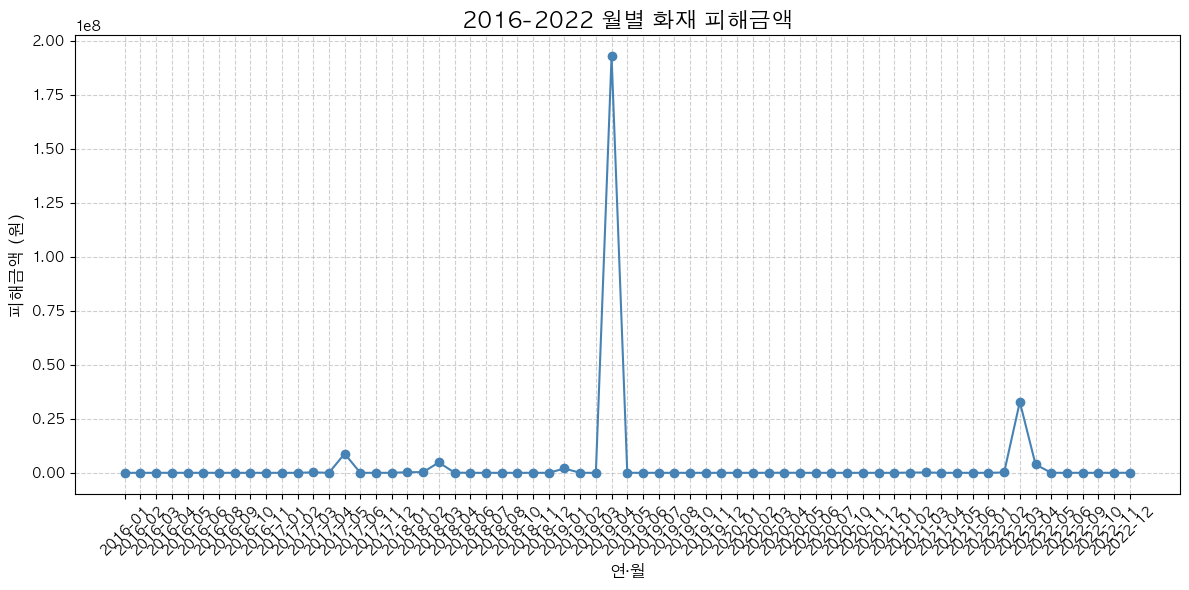

In [22]:
# 1) ocrn_ymd를 datetime으로 변환
df['date'] = pd.to_datetime(df['OCRN_YMD'], format='%Y%m%d')

# 2) 연·월 추출
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# 3) 2016~2022년 필터
df = df[(df['year'] >= 2016) & (df['year'] <= 2022)]

# 4) 연·월별 합계 집계
df['year_month'] = df['date'].dt.to_period('M')
monthly_sum = df.groupby('year_month')['PRPT_DAM_AMT'].sum().reset_index()

# 5) 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum['year_month'].astype(str), monthly_sum['PRPT_DAM_AMT'], marker='o', color='steelblue')
plt.title('2016-2022 월별 화재 피해금액', fontsize=16)
plt.xlabel('연·월', fontsize=12)
plt.ylabel('피해금액 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
# 날짜 변환
df['OCRN_YMD'] = pd.to_datetime(df['OCRN_YMD'], format='%Y%m%d')

# 2019년 4월 4일 데이터 필터링
df_april_2019 = df[
    (df['OCRN_YMD'].dt.year == 2019) &
    (df['OCRN_YMD'].dt.month == 4) &
    (df['OCRN_YMD'].dt.day == 4)
]

#  HTML 표로 출력
display(df_april_2019.head(20))

,GRNDS_ARVL_YMD,IGTN_HTSRC_SCLSF_NM,IGTN_HTSRC_LCLSF_NM,OCRN_YMD,MBLZ_EQPMNT_CNT,WHOL_MNPW_CNT,TP_VL,GRNDS_SGG_NM,CBK_YMD,GRNDS_DSTNC,LYCRG_FRBRG_NOPE,MBLZ_POLICEO_CNT,BGNN_POTFR_TM,FRST_IGOBJ_LCLSF_NM,MBLZ_PRVTM_GAS_REL_INST_CNT,HUM_VL,INJPSN_CNT,ACDNT_OCRN_LOT,FIRE_OCRN_HR,GRNDS_ARVL_TM,PRFECT_POTFR_TM,WTHR_INFO,FCLT_PLC_SCLSF_NM,BGNN_POTFR_YMD,CMBS_EXPOBJ_LCLSF_NM,ACDNT_OCRN_LAT,DSPT_TM,DCSD_CNT,OCRN_CS_NM,MBLZ_FFPWR_CNT,FIRE_TYPE_NM,CBK_TM,ETC_MBLZ_NOPE,MBLZ_GNRL_OCPT_NOPE,RCPT_YMD,IGTN_CS_NM,RCPT_TM,PRFECT_POTFR_YMD,IGTN_DMNT_SCLSF_NM,DSPT_REQ_TM,FRST_IGOBJ_SCLSF_NM,HR_UNIT_WSPD,LFDAU_GRNDS_DSTNC,FRSTN_NM,DSPT_YMD,PRPT_DAM_AMT,CMBS_EXPOBJ_SCLSF_NM,year,IGTN_BRNCH_NM,SN,IGTN_DMNT_LCLSF_NM,MBLZ_SOLD_CNT,CNTR_GRNDS_DSTNC,HR_UNIT_WNDRCT,FIRE_SUPESN_REQ_TM,CNTR_NM,HNL_DAM_CNT,date,month,year_month
348,20190404,쓰레기소각,불꽃/불티,2019-04-04,11,71,16.0,횡성군,20190404,6,15,5,135214,종이/목재/건초등,0,29,0,NaN,11600,12933,20002,맑음,사유림,20190404,NaN,NaN,11801,0,미상,11,임야,24203,0,40,20190404,기타,11630,20190404,쓰레기/논밭두렁,1132,종이,225.0,12.0,횡성소방서,20190404,0,NaN,2019,산아래,34,부주의,0,6,8.0,3029,횡성119안전센터,0,2019-04-04,4,2019-04
349,20190404,불씨/불꽃/화원방치,불꽃/불티,2019-04-04,4659,3559,15.0,인제군,20190405,6,331,147,142231,종이/목재/건초등,207,26,0,NaN,24500,25300,120000,맑음,국유림,20190405,NaN,NaN,24532,0,미상,631,임야,50000,1101,842,20190404,미상,24506,20190405,비화,728,건초,225.0,9.0,인제소방서,20190404,116829,NaN,2019,산아래,35,부주의,300,6,12.0,210700,인제119안전센터,0,2019-04-04,4,2019-04
350,20190404,쓰레기소각,불꽃/불티,2019-04-04,13,120,18.0,원주시,20190404,32,34,7,171043,종이/목재/건초등,50,24,0,NaN,41200,42256,52331,맑음,사유림,20190404,종이/목재/건초등,NaN,41354,0,가연성물질의급격한연소/기상(건조/강풍등),20,임야,65013,0,9,20190404,성묘객,41220,20190404,쓰레기/논밭두렁,902,잔디,315.0,4.0,원주소방서,20190404,0,풀/나뭇잎,2019,산아래,36,부주의,0,11,4.0,10035,문막119안전센터,0,2019-04-04,4,2019-04
351,20190404,전기적요인,작동기기,2019-04-04,1028,16742,16.0,고성군,20190405,27,265,563,184104,종이/목재/건초등,97,18,0,NaN,71700,72811,64104,맑음,공유림,20190405,종이/목재/건초등,NaN,71815,2,미상,2565,임야,64104,1149,3941,20190404,기타,71738,20190405,불꽃/스파크/정전기,956,풀/나뭇잎,270.0,0.0,고성소방서,20190404,118520136,풀/나뭇잎,2019,평지,37,전기적요인,8162,12,17.0,231253,동광119안전센터,2,2019-04-04,4,2019-04
352,20190404,미상,미상,2019-04-04,440,6657,15.0,강릉시,20190407,32,403,1050,154717,미상,270,17,2,NaN,114600,115533,34717,맑음,사유림,20190406,종이/목재/건초등,NaN,114719,0,가연성물질의급격한연소/기상(건조/강풍등),1424,임야,73815,0,1200,20190404,건물,114602,20190406,미상,814,미상,225.0,0.0,강릉소방서,20190404,74260991,나무,2019,산중턱,38,미상,2310,5,12.0,155144,옥계119안전센터,2,2019-04-04,4,2019-04


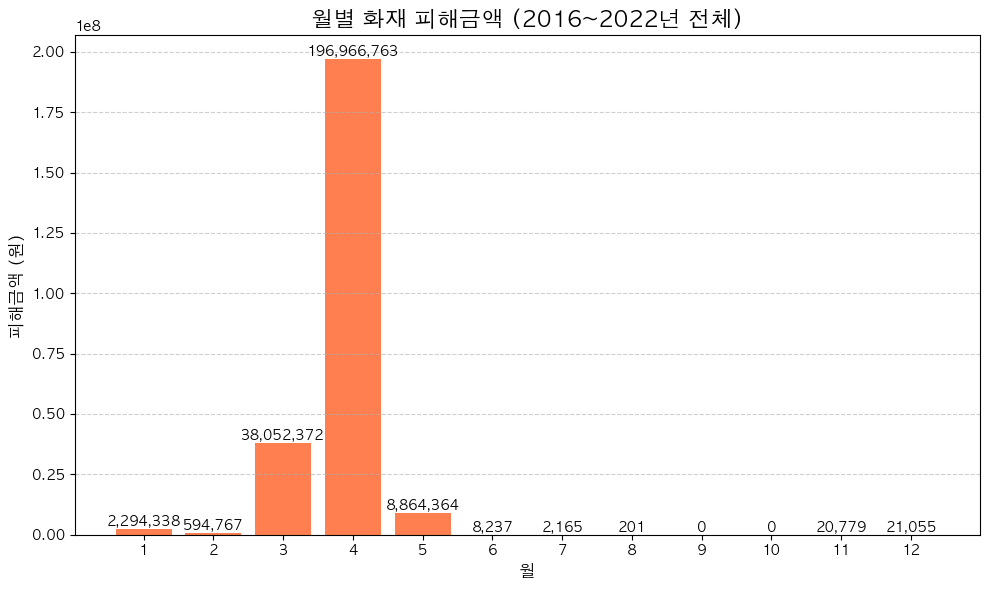

In [23]:
# 1) ocrn_ymd를 datetime으로 변환
df['date'] = pd.to_datetime(df['OCRN_YMD'], format='%Y%m%d')

# 2) 연·월 추출
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# 3) 2016~2022년 필터
df = df[(df['year'] >= 2016) & (df['year'] <= 2022)]

# 4) 월별 합계 집계 (연도 무시)
monthly_sum = df.groupby('month')['PRPT_DAM_AMT'].sum().reset_index()

# 5) 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_sum['month'], monthly_sum['PRPT_DAM_AMT'], color='coral')
plt.title('월별 화재 피해금액 (2016~2022년 전체)', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('피해금액 (원)', fontsize=12)

# 막대 위에 수치 표시
for i, val in enumerate(monthly_sum['PRPT_DAM_AMT']):
    plt.text(i + 1, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

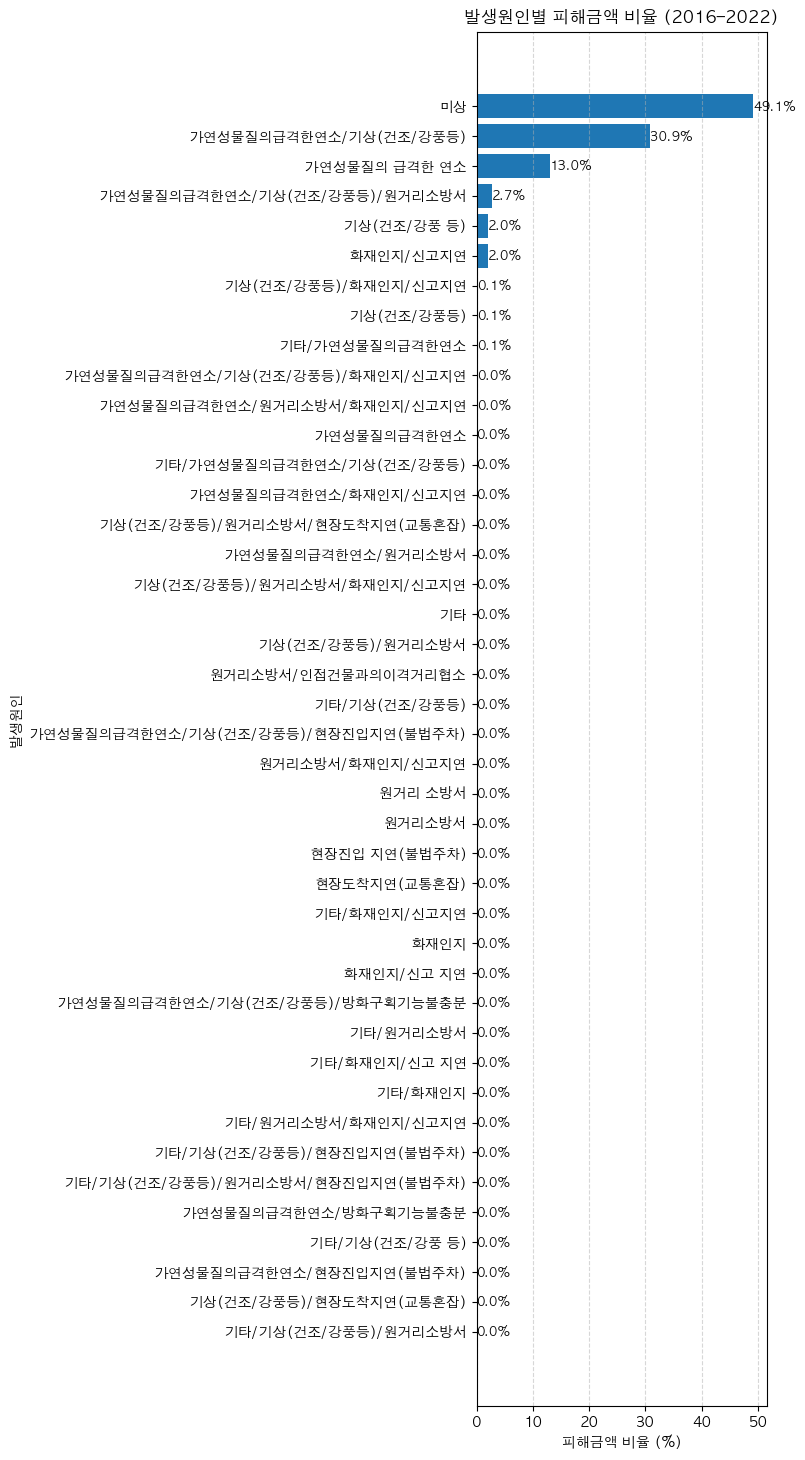

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 0) 연도 범위 정의
# -------------------------
YEAR_FROM = 2016
YEAR_TO = 2022

# -------------------------
# 1) 날짜 필터링
# -------------------------
if "OCRN_YMD" in df.columns:
    dt = pd.to_datetime(df["OCRN_YMD"].astype(str), format="%Y%m%d", errors="coerce")
    df = df[(dt.dt.year >= YEAR_FROM) & (dt.dt.year <= YEAR_TO)]

# -------------------------
# 2) 변수 전처리
# -------------------------
df["OCRN_CS_NM"] = df.get("OCRN_CS_NM", pd.Series(index=df.index)).fillna("미상").astype(str).str.strip()


# -------------------------
# 3) 합계 및 비율 계산
# -------------------------
agg = (
    df.groupby("OCRN_CS_NM", dropna=False)["PRPT_DAM_AMT"]
      .sum()
      .reset_index()
      .rename(columns={"PRPT_DAM_AMT": "TOTAL"})
)
agg["PCT"] = agg["TOTAL"] / agg["TOTAL"].sum() * 100
agg = agg.sort_values("PCT", ascending=False)

# -------------------------
# 4) 퍼센티지 시각화
# -------------------------
plt.figure(figsize=(8, max(5, len(agg)*0.35)))
bars = plt.barh(agg["OCRN_CS_NM"], agg["PCT"])
plt.gca().invert_yaxis()
plt.xlabel("피해금액 비율 (%)")
plt.ylabel("발생원인")
plt.title(f"발생원인별 피해금액 비율 ({YEAR_FROM}–{YEAR_TO})")

# 값 표시
for i, b in enumerate(bars):
    pct_val = agg["PCT"].iloc[i]
    plt.text(b.get_width(), b.get_y() + b.get_height()/2,
             f"{pct_val:.1f}%", va="center", ha="left", fontsize=9)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


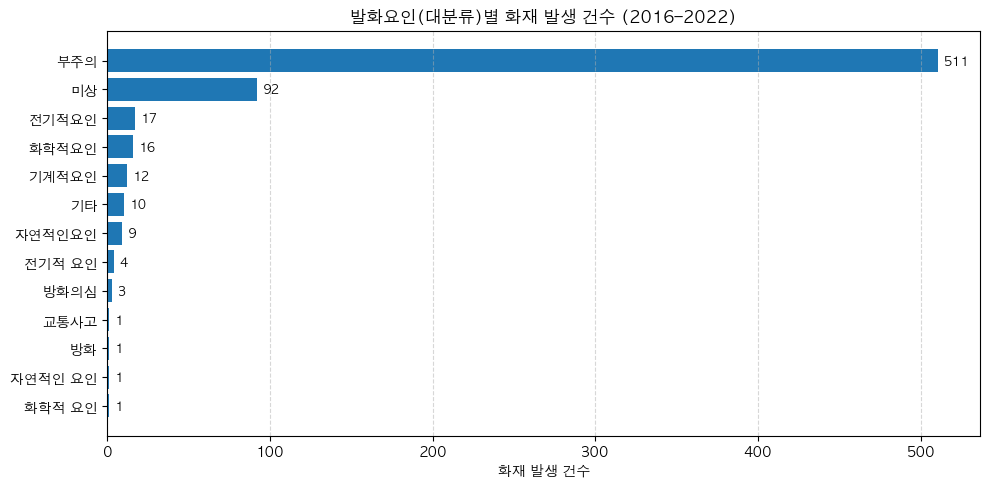

In [26]:
TOP_N      = None   # 상위 N개만 보려면 정수, 전체면 None
SHOW_PCT   = False  # True로 바꾸면 "건수 (비율%)" 같이 라벨 표기


# 발화요인 대분류 컬럼 준비
cause_col = "IGTN_DMNT_LCLSF_NM"
if cause_col not in df.columns:
    raise ValueError(f"필수 컬럼이 없습니다: {cause_col}")
df[cause_col] = df[cause_col].fillna("미상").astype(str).str.strip()

# =========================
# 발화요인별 '건수' 집계 + 비율
# =========================
count_tbl = (
    df.groupby(cause_col, dropna=False)
      .size()
      .reset_index(name="COUNT")
      .sort_values("COUNT", ascending=False)
      .reset_index(drop=True)
)
count_tbl["PCT"] = count_tbl["COUNT"] / count_tbl["COUNT"].sum() * 100

# 상위 N개만 보기
if TOP_N is not None:
    count_tbl = count_tbl.head(TOP_N)


# =========================
# 건수 막대그래프 + 막대 끝에 숫자(옵션: 비율)
# =========================
labels = count_tbl[cause_col].astype(str).tolist()
vals   = count_tbl["COUNT"].to_numpy()
pcts   = count_tbl["PCT"].to_numpy()
ypos   = np.arange(len(labels))

plt.figure(figsize=(10, max(5, len(labels)*0.35)))
bars = plt.barh(ypos, vals)   # 색상은 기본값 사용
plt.gca().invert_yaxis()
plt.yticks(ypos, labels)
plt.xlabel("화재 발생 건수")
plt.title(f"발화요인(대분류)별 화재 발생 건수 ({YEAR_FROM}–{YEAR_TO})")

# 막대 끝에 라벨(숫자) 붙이기 — annotate 사용
for i, b in enumerate(bars):
    v = int(vals[i])
    label = f"{v:,}" if not SHOW_PCT else f"{v:,} ({pcts[i]:.1f}%)"
    plt.annotate(label,
                 xy=(b.get_width(), b.get_y() + b.get_height()/2),
                 xytext=(4, 0), textcoords="offset points",
                 ha="left", va="center", fontsize=9)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

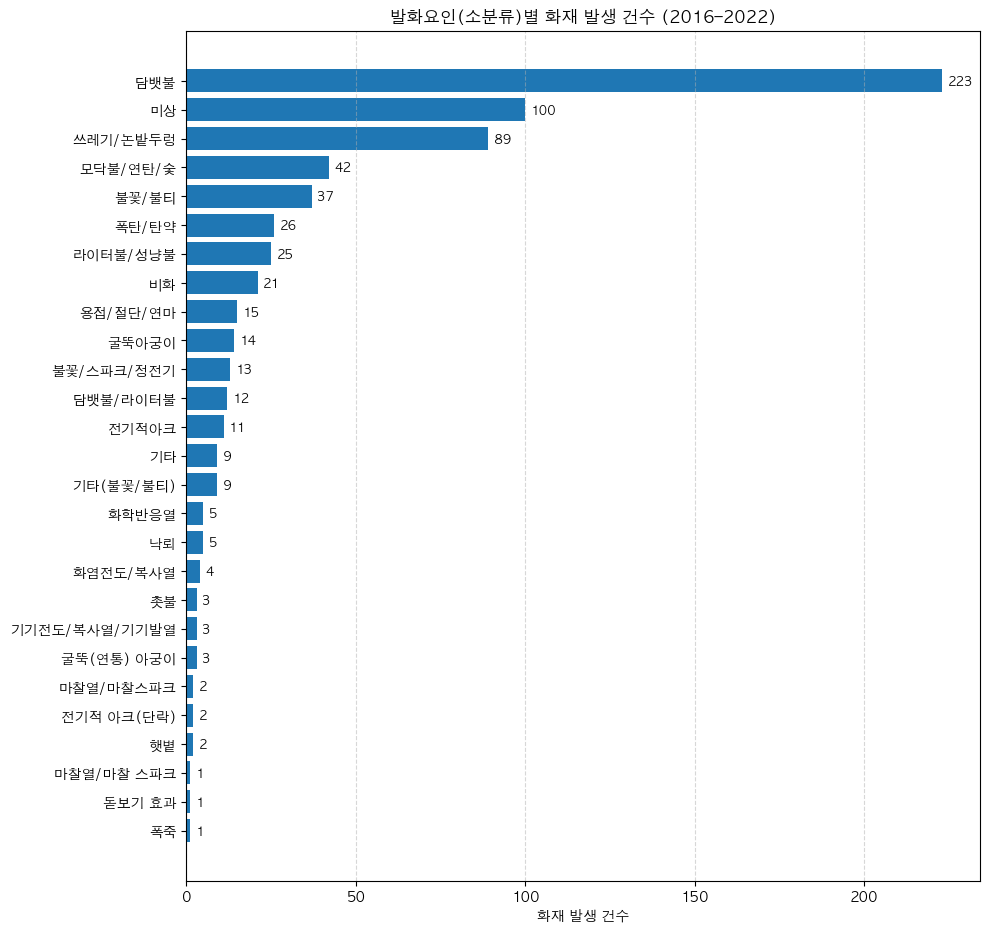

In [27]:
TOP_N      = None   # 상위 N개만 보려면 정수, 전체면 None
SHOW_PCT   = False  # True로 바꾸면 "건수 (비율%)" 같이 라벨 표기

# 발화요인 소분류 컬럼 준비
cause_col = "IGTN_DMNT_SCLSF_NM"
if cause_col not in df.columns:
    raise ValueError(f"필수 컬럼이 없습니다: {cause_col}")
df[cause_col] = df[cause_col].fillna("미상").astype(str).str.strip()

# =========================
# 발화요인 소분류별 '건수' 집계 + 비율
# =========================
count_tbl = (
    df.groupby(cause_col, dropna=False)
      .size()
      .reset_index(name="COUNT")
      .sort_values("COUNT", ascending=False)
      .reset_index(drop=True)
)
count_tbl["PCT"] = count_tbl["COUNT"] / count_tbl["COUNT"].sum() * 100

# 상위 N개만 보기
if TOP_N is not None:
    count_tbl = count_tbl.head(TOP_N)


# =========================
# 건수 막대그래프 + 막대 끝에 숫자(옵션: 비율)
# =========================
labels = count_tbl[cause_col].astype(str).tolist()
vals   = count_tbl["COUNT"].to_numpy()
pcts   = count_tbl["PCT"].to_numpy()
ypos   = np.arange(len(labels))

plt.figure(figsize=(10, max(5, len(labels)*0.35)))
bars = plt.barh(ypos, vals)   # 색상은 기본값 사용
plt.gca().invert_yaxis()
plt.yticks(ypos, labels)
plt.xlabel("화재 발생 건수")
plt.title(f"발화요인(소분류)별 화재 발생 건수 ({YEAR_FROM}–{YEAR_TO})")

# 막대 끝에 라벨(숫자) 붙이기 — annotate 사용
for i, b in enumerate(bars):
    v = int(vals[i])
    label = f"{v:,}" if not SHOW_PCT else f"{v:,} ({pcts[i]:.1f}%)"
    plt.annotate(label,
                 xy=(b.get_width(), b.get_y() + b.get_height()/2),
                 xytext=(4, 0), textcoords="offset points",
                 ha="left", va="center", fontsize=9)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

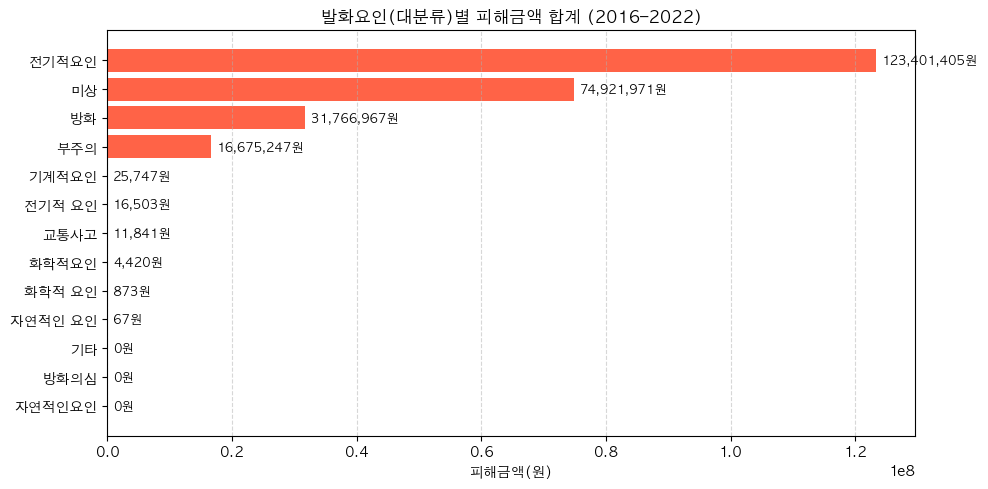

In [28]:
TOP_N      = None   # 상위 N개만 보려면 정수, 전체면 None
SHOW_PCT   = False  # True로 바꾸면 "건수 (비율%)" 같이 라벨 표기

# =========================
# 발화요인(대분류)별 피해금액 집계
# =========================
cause_col = "IGTN_DMNT_LCLSF_NM"
amt_col   = "PRPT_DAM_AMT"

df[cause_col] = df[cause_col].fillna("미상").astype(str).str.strip()
df[amt_col]   = pd.to_numeric(df[amt_col], errors="coerce").fillna(0)

damage_tbl = (
    df.groupby(cause_col, dropna=False)[amt_col]
      .sum()
      .reset_index(name="TOTAL_DAMAGE")
      .sort_values("TOTAL_DAMAGE", ascending=False)
      .reset_index(drop=True)
)
damage_tbl["PCT"] = damage_tbl["TOTAL_DAMAGE"] / damage_tbl["TOTAL_DAMAGE"].sum() * 100

if TOP_N is not None:
    damage_tbl = damage_tbl.head(TOP_N)

# =========================
# 시각화
# =========================
labels = damage_tbl[cause_col].tolist()
vals   = damage_tbl["TOTAL_DAMAGE"].to_numpy()
pcts   = damage_tbl["PCT"].to_numpy()
ypos   = range(len(labels))

plt.figure(figsize=(10, max(5, len(labels)*0.35)))
bars = plt.barh(ypos, vals, color="tomato")
plt.gca().invert_yaxis()
plt.yticks(ypos, labels)
plt.xlabel("피해금액(원)")
plt.title(f"발화요인(대분류)별 피해금액 합계 ({YEAR_FROM}–{YEAR_TO})")

for i, b in enumerate(bars):
    v = vals[i]
    label = f"{v:,.0f}원" if not SHOW_PCT else f"{v:,.0f}원 ({pcts[i]:.1f}%)"
    plt.annotate(label,
                 xy=(b.get_width(), b.get_y() + b.get_height()/2),
                 xytext=(4, 0), textcoords="offset points",
                 ha="left", va="center", fontsize=9)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
# DSPT_TM: 출동 시각, GRNDS_ARVL_TM: 현장 도착 시각, DSPT_REQ_TM: 출동 소요 시간, FIRE_SUPESN_REQ_TM: 화재 진압 소요 시간
df[["DSPT_TM", "GRNDS_ARVL_TM", "DSPT_REQ_TM", "FIRE_SUPESN_REQ_TM"]].head(20)


,DSPT_TM,GRNDS_ARVL_TM,DSPT_REQ_TM,FIRE_SUPESN_REQ_TM
0,113226,115335,2109,13825
1,135404,135605,201,200
2,151116,151538,422,3919
3,142913,143359,446,3824
4,112552,114341,1749,2151
5,183627,184750,1123,31900
6,125532,130619,1047,1008
7,163315,164226,911,1511
8,120116,122014,1858,1100
9,170306,171318,1012,10931


절편(Intercept): 668260.46
기울기(Slope): -20210.83
R²: 0.0011


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


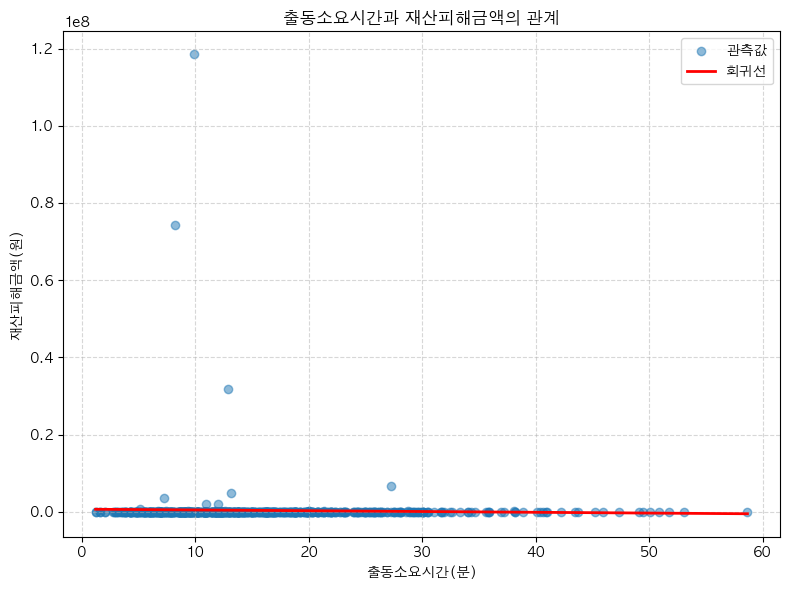

In [30]:
from sklearn.linear_model import LinearRegression

# =========================
# 데이터 준비
# =========================
# DSPT_REQ_TM이 MMSS 형태라고 가정 → '총 소요 시간(분)'으로 변환
def mmss_to_minutes(val):
    try:
        val_str = str(int(val)).zfill(4)   # 4자리 맞추기
        mm = int(val_str[:2])              # 앞 2자리: 분
        ss = int(val_str[2:])              # 뒤 2자리: 초
        return mm + ss / 60                # 분 단위로 변환
    except:
        return np.nan

df["DSPT_REQ_MIN"] = df["DSPT_REQ_TM"].apply(mmss_to_minutes)

# 피해금액 컬럼을 숫자로 변환
df["PRPT_DAM_AMT"] = pd.to_numeric(df["PRPT_DAM_AMT"], errors="coerce")

# 결측 제거
df_clean = df.dropna(subset=["DSPT_REQ_MIN", "PRPT_DAM_AMT"])

# =========================
# 회귀분석
# =========================
X = df_clean[["DSPT_REQ_MIN"]]
y = df_clean["PRPT_DAM_AMT"]

model = LinearRegression()
model.fit(X, y)

# 회귀선 데이터
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

# 회귀 계수 출력
print(f"절편(Intercept): {model.intercept_:.2f}")
print(f"기울기(Slope): {model.coef_[0]:.2f}")
print(f"R²: {model.score(X, y):.4f}")

# =========================
# 시각화
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["DSPT_REQ_MIN"], df_clean["PRPT_DAM_AMT"], alpha=0.5, label="관측값")
plt.plot(x_vals, y_vals, color="red", label="회귀선", linewidth=2)
plt.xlabel("출동소요시간(분)")
plt.ylabel("재산피해금액(원)")
plt.title("출동소요시간과 재산피해금액의 관계")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

절편(Intercept): -514824.64
기울기(Slope): 5815.13
R²: 0.0701


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


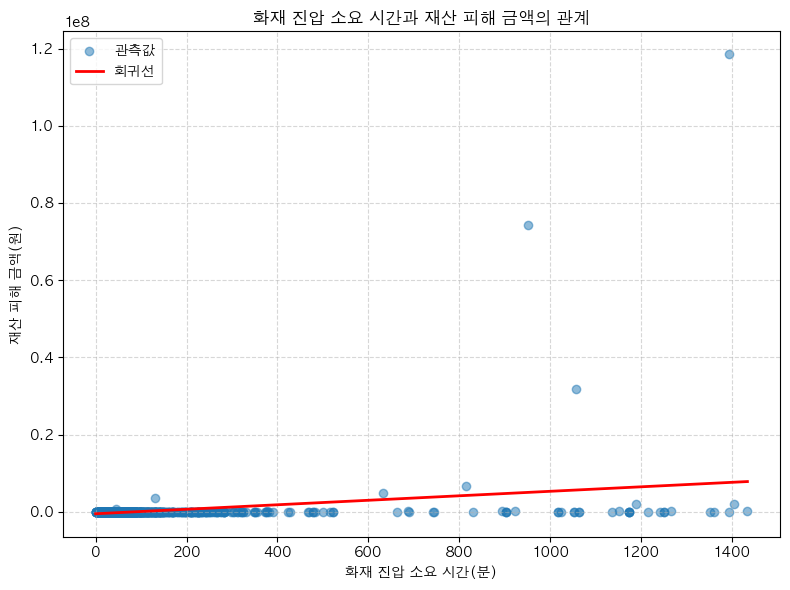

In [31]:
# =========================
# 1) FIRE_SUPESN_REQ_TM → 분 단위 변환 함수
# =========================
def hms_to_minutes(val):
    try:
        val_str = str(int(val)).zfill(6)  # 6자리 맞추기 (HHMMSS)
        hh = int(val_str[:2])             # 시
        mm = int(val_str[2:4])            # 분
        ss = int(val_str[4:])             # 초
        return hh * 60 + mm + ss / 60
    except:
        return np.nan

df["FIRE_SUPESN_MIN"] = df["FIRE_SUPESN_REQ_TM"].apply(hms_to_minutes)

# 피해금액 컬럼 숫자로 변환
df["PRPT_DAM_AMT"] = pd.to_numeric(df["PRPT_DAM_AMT"], errors="coerce")

# 결측 제거
df_clean = df.dropna(subset=["FIRE_SUPESN_MIN", "PRPT_DAM_AMT"])

# =========================
# 2) 회귀분석
# =========================
X = df_clean[["FIRE_SUPESN_MIN"]]
y = df_clean["PRPT_DAM_AMT"]

model = LinearRegression()
model.fit(X, y)

# 회귀선 데이터
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

# 회귀 계수 출력
print(f"절편(Intercept): {model.intercept_:.2f}")
print(f"기울기(Slope): {model.coef_[0]:.2f}")
print(f"R²: {model.score(X, y):.4f}")

# =========================
# 3) 시각화
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["FIRE_SUPESN_MIN"], df_clean["PRPT_DAM_AMT"], alpha=0.5, label="관측값")
plt.plot(x_vals, y_vals, color="red", linewidth=2, label="회귀선")
plt.xlabel("화재 진압 소요 시간(분)")
plt.ylabel("재산 피해 금액(원)")
plt.title("화재 진압 소요 시간과 재산 피해 금액의 관계")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/r6/y99jmfln47q2t97qj84_3n080000gn/T/ipykernel_6479/2085765495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fire_counts, x='건수', y='발화지점', palette='viridis')


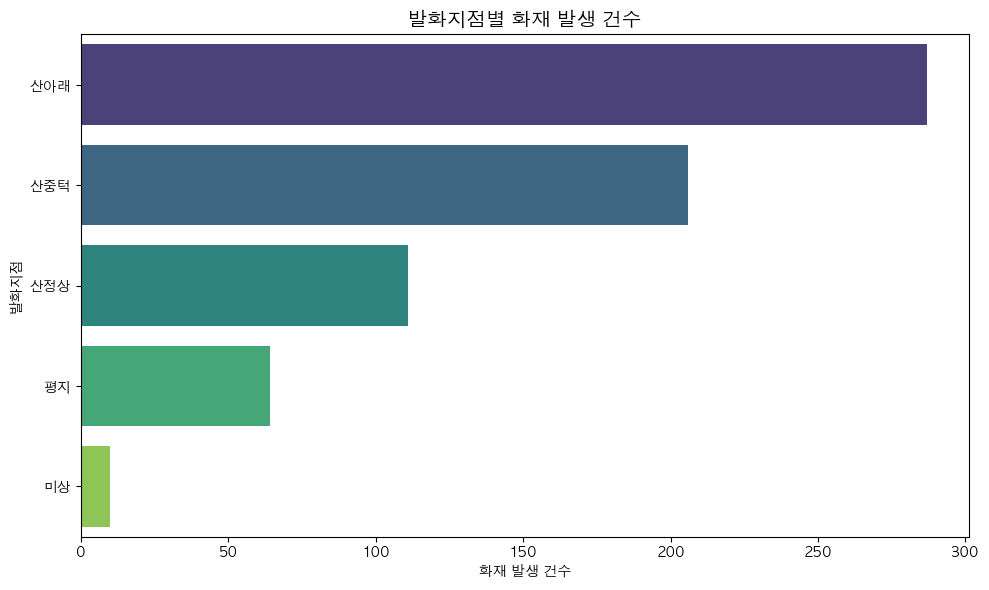

In [33]:
import seaborn as sns

# 발화지점별 화재 발생 건수 집계
fire_counts = df['IGTN_BRNCH_NM'].value_counts().reset_index()
fire_counts.columns = ['발화지점', '건수']

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=fire_counts, x='건수', y='발화지점', palette='viridis')
plt.title('발화지점별 화재 발생 건수', fontsize=14)
plt.xlabel('화재 발생 건수')
plt.ylabel('발화지점')
plt.tight_layout()
plt.show()


IGTN_BRNCH_NM
평지     1.9276995781e+06
산중턱    3.7165486408e+05
산아래    1.3837198955e+05
산정상    6.1967144144e+04
미상     3.0025200000e+04
Name: PRPT_DAM_AMT, dtype: float64


/var/folders/r6/y99jmfln47q2t97qj84_3n080000gn/T/ipykernel_6479/4161217824.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


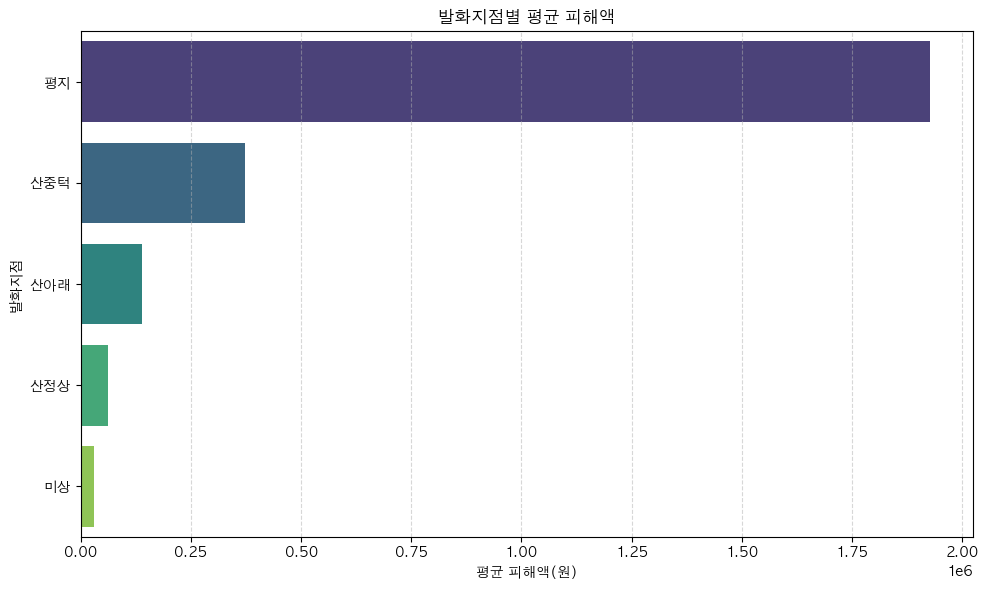

In [34]:
# 피해액 숫자 변환
df["PRPT_DAM_AMT"] = pd.to_numeric(df["PRPT_DAM_AMT"], errors="coerce")

# 발화지점 결측 제거
df_clean = df.dropna(subset=["IGTN_BRNCH_NM", "PRPT_DAM_AMT"]).copy()

# 1) 발화지점별 평균 피해액
avg_damage = (
    df_clean.groupby("IGTN_BRNCH_NM")["PRPT_DAM_AMT"]
    .mean()
    .sort_values(ascending=False)
)
print(avg_damage)

# 2) 시각화 - 바 플롯
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_damage.values,
    y=avg_damage.index,
    palette="viridis"
)
plt.xlabel("평균 피해액(원)")
plt.ylabel("발화지점")
plt.title("발화지점별 평균 피해액")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()